<a href="https://colab.research.google.com/github/brian-lear/study/blob/main/Pytorch_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
# TODO
# regression -- done
# classifier single class -- done
# classifier multi class -- done

# image, with data augmentation
# data wrangling with tensors
## from numpy to tensor
## formating to correct type
## formatting to correct device
## formatting to correct shape

In [142]:
# answers

# data loader only if I need to run batches? -> for memory purpose. small tabular data does not need it. mostly for images, audio, text and videos

In [143]:
# ?
# how to check device type for model, tensor
# what other things to check with reg lin? activation function?
# be able to explain kernel, stride, padding
# explain why CNN -> ReLU -> MaxPool

# Regression Model

In [144]:
import torch
from torch import nn

In [145]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [146]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.002

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]),
 tensor([[0.3000],
         [0.3014],
         [0.3028],
         [0.3042],
         [0.3056],
         [0.3070],
         [0.3084],
         [0.3098],
         [0.3112],
         [0.3126]]))

In [147]:
# train test split

train_size = 0.8
n_samples = len(X)
train_max_index = int(n_samples*train_size)

X_train = X[:train_max_index]
y_train = y[:train_max_index]

X_test = X[train_max_index:]
y_test = y[train_max_index:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

In [148]:
# model

class RegressionModel(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features = in_shape, out_features=hidden_units),
        nn.Linear(in_features = hidden_units, out_features=hidden_units),
        nn.Linear(in_features = hidden_units, out_features=out_shape),
    )

  def forward(self, x):
    return self.layers(x)

reg_model = RegressionModel(in_shape = 1,
                            hidden_units = 8,
                            out_shape = 1).to(device)
reg_model, reg_model.state_dict()

(RegressionModel(
   (layers): Sequential(
     (0): Linear(in_features=1, out_features=8, bias=True)
     (1): Linear(in_features=8, out_features=8, bias=True)
     (2): Linear(in_features=8, out_features=1, bias=True)
   )
 ),
 OrderedDict([('layers.0.weight',
               tensor([[-0.0332],
                       [-0.7452],
                       [-0.9476],
                       [ 0.2356],
                       [ 0.7045],
                       [-0.6210],
                       [-0.6665],
                       [-0.3817]], device='cuda:0')),
              ('layers.0.bias',
               tensor([ 0.5474,  0.4016, -0.8886,  0.6645,  0.2654,  0.3339,  0.1311,  0.4539],
                      device='cuda:0')),
              ('layers.1.weight',
               tensor([[ 0.2088,  0.0564,  0.2244,  0.1204,  0.1907, -0.1149,  0.1917,  0.2668],
                       [ 0.1809, -0.2128,  0.0316, -0.1570,  0.2389, -0.1628,  0.3145,  0.0458],
                       [ 0.2258, -0.0486,  0.082

In [149]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.1)

In [150]:
torch.manual_seed(601)
torch.cuda.manual_seed(601)

epochs = 1000
train_loss_list = []
test_loss_list = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  reg_model.train()

  preds = reg_model(X_train)

  loss = loss_fn(preds,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  reg_model.eval()
  with torch.inference_mode():

    preds = reg_model(X_test)
    test_loss = loss_fn(preds,y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train Loss: {loss}, Test Loss: {test_loss}')


Epoch: 0, Train Loss: 0.5214242935180664, Test Loss: 0.6090110540390015
Epoch: 100, Train Loss: 0.1110914796590805, Test Loss: 0.017115430906414986
Epoch: 200, Train Loss: 0.058582935482263565, Test Loss: 0.014295924454927444
Epoch: 300, Train Loss: 0.06813984364271164, Test Loss: 0.009567316621541977
Epoch: 400, Train Loss: 0.06203325092792511, Test Loss: 0.010136101394891739
Epoch: 500, Train Loss: 0.05053359270095825, Test Loss: 0.01908722333610058
Epoch: 600, Train Loss: 0.05289049819111824, Test Loss: 0.01582731120288372
Epoch: 700, Train Loss: 0.05753183737397194, Test Loss: 0.006720205303281546
Epoch: 800, Train Loss: 0.0529637336730957, Test Loss: 0.006690515670925379
Epoch: 900, Train Loss: 0.06404364109039307, Test Loss: 0.020400667563080788


In [151]:
next(reg_model.parameters()).device

device(type='cuda', index=0)

In [152]:
reg_model.eval()

with torch.inference_mode():
  preds = reg_model(X_test)

preds[:10], y_test[:10]

(tensor([[0.7437],
         [0.7448],
         [0.7460],
         [0.7472],
         [0.7483],
         [0.7495],
         [0.7507],
         [0.7518],
         [0.7530],
         [0.7542]], device='cuda:0'),
 tensor([[0.8600],
         [0.8614],
         [0.8628],
         [0.8642],
         [0.8656],
         [0.8670],
         [0.8684],
         [0.8698],
         [0.8712],
         [0.8726]], device='cuda:0'))

In [153]:
# save model

from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok= True)

MODEL_NAME = 'regmodel.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=reg_model.state_dict(), f=MODEL_SAVE_PATH)

In [154]:
# load model

loaded_model = RegressionModel(in_shape = 1,
                            hidden_units = 8,
                            out_shape = 1).to(device)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)
loaded_model

RegressionModel(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [155]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)
preds[:10] == loaded_model_preds[:10]

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Classification Model - Single Class

In [156]:
import torch
from torch import nn

In [157]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [158]:
from sklearn.datasets import make_circles
import pandas as pd

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)

# Make DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [159]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 601)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [161]:
class SingleClassifierModel(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features=in_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_shape),
    )

  def forward(self,x):
    return self.layers(x)

class_model = SingleClassifierModel(in_shape=2, hidden_units=10, out_shape=1).to(device)
class_model

SingleClassifierModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [162]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(class_model.parameters(), lr=0.1)

In [163]:
try:
  from torchmetrics.classification import BinaryAccuracy
except:
  !pip install torchmetrics
  from torchmetrics.classification import BinaryAccuracy


In [164]:
acc_fn = BinaryAccuracy().to(device)

In [165]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  class_model.train()

  logits = class_model(X_train).squeeze()
  y_pred_proba = torch.sigmoid(logits)
  y_pred = torch.round(y_pred_proba)

  loss = loss_fn(logits, y_train)
  acc = acc_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  class_model.eval()
  with torch.inference_mode():
    logits = class_model(X_test).squeeze()
    y_pred_proba = torch.sigmoid(logits)
    y_pred = torch.round(y_pred_proba)

    loss_test = loss_fn(logits, y_test)
    acc_test = acc_fn(y_pred,y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train Loss: {loss}, Train Acc: {acc}, Test Loss: {loss_test}, Test Acc: {acc_test}')

Epoch: 0, Train Loss: 0.7047103047370911, Train Acc: 0.4937500059604645, Test Loss: 0.6940680742263794, Test Acc: 0.5249999761581421
Epoch: 100, Train Loss: 0.6923341155052185, Train Acc: 0.574999988079071, Test Loss: 0.6911073923110962, Test Acc: 0.5849999785423279
Epoch: 200, Train Loss: 0.6901578903198242, Train Acc: 0.6075000166893005, Test Loss: 0.6901924014091492, Test Acc: 0.6100000143051147
Epoch: 300, Train Loss: 0.6875978708267212, Train Acc: 0.6337500214576721, Test Loss: 0.6883881092071533, Test Acc: 0.625
Epoch: 400, Train Loss: 0.6839185953140259, Train Acc: 0.6312500238418579, Test Loss: 0.6855964660644531, Test Acc: 0.6150000095367432
Epoch: 500, Train Loss: 0.6774665713310242, Train Acc: 0.6349999904632568, Test Loss: 0.6805399656295776, Test Acc: 0.6100000143051147
Epoch: 600, Train Loss: 0.6671475172042847, Train Acc: 0.6587499976158142, Test Loss: 0.6709545254707336, Test Acc: 0.625
Epoch: 700, Train Loss: 0.6496069431304932, Train Acc: 0.7225000262260437, Test Loss

# Classification Model - Multi Class

In [166]:
import torch
from torch import nn

In [167]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [168]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X, y = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y)

X[:10], y[:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [169]:
n_classes = int(max(torch.unique(y)) + 1)
n_classes

4

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 601)

In [171]:
class MultiClassifierModel(nn.Module):
  def __init__(self,in_shape, hidden_units, out_shape):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features=in_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_shape),
    )

  def forward(self,x):
    return self.layers(x)

mclass_model = MultiClassifierModel(in_shape=2,
                                    hidden_units=10,
                                    out_shape=n_classes).to(device)
mclass_model

MultiClassifierModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [172]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mclass_model.parameters(), lr=0.1)

In [ ]:
try:
  from torchmetrics.classification import MulticlassAccuracy
except:
  !pip install torchmetrics
  from torchmetrics.classification import MulticlassAccuracy


In [173]:
acc_fn = MulticlassAccuracy(num_classes=n_classes).to(device)

In [174]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  mclass_model.train()

  logits = mclass_model(X_train)
  y_pred_probas = torch.softmax(logits,dim=1)
  y_pred = torch.argmax(y_pred_probas,dim=1)

  loss = loss_fn(logits,y_train)
  acc = acc_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  mclass_model.eval()
  with torch.inference_mode():
    logits = mclass_model(X_test)
    y_pred_probas = torch.softmax(logits,dim=1)
    y_pred = torch.argmax(y_pred_probas,dim=1)

    loss_test = loss_fn(logits,y_test)
    acc_test = acc_fn(y_pred,y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train Loss: {loss:.5}, Train Acc: {acc:.2f}%, Test Loss: {loss_test:.5}, Test Acc: {acc_test:.2f}%')

Epoch: 0, Train Loss: 1.3452, Train Acc: 0.37%, Test Loss: 1.219, Test Acc: 0.49%
Epoch: 100, Train Loss: 0.027071, Train Acc: 0.99%, Test Loss: 0.047189, Test Acc: 0.99%
Epoch: 200, Train Loss: 0.019319, Train Acc: 0.99%, Test Loss: 0.046727, Test Acc: 0.99%
Epoch: 300, Train Loss: 0.017058, Train Acc: 0.99%, Test Loss: 0.048715, Test Acc: 0.99%
Epoch: 400, Train Loss: 0.015954, Train Acc: 0.99%, Test Loss: 0.050546, Test Acc: 0.99%
Epoch: 500, Train Loss: 0.015273, Train Acc: 0.99%, Test Loss: 0.052025, Test Acc: 0.99%
Epoch: 600, Train Loss: 0.01479, Train Acc: 0.99%, Test Loss: 0.05315, Test Acc: 0.99%
Epoch: 700, Train Loss: 0.014404, Train Acc: 0.99%, Test Loss: 0.054015, Test Acc: 0.99%
Epoch: 800, Train Loss: 0.014075, Train Acc: 0.99%, Test Loss: 0.05466, Test Acc: 0.99%
Epoch: 900, Train Loss: 0.01379, Train Acc: 0.99%, Test Loss: 0.055132, Test Acc: 0.99%


# Image Detection Model - no data Augmentation

In [237]:
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [238]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [239]:
class_names = train_data.classes

In [240]:
train_data.classes, train_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

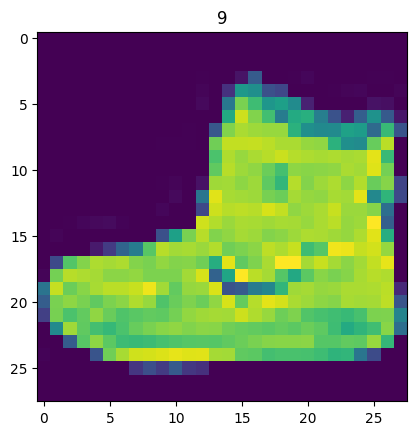

In [241]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

In [242]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader = DataLoader(train_data,
                              shuffle=True,
                              batch_size=BATCH_SIZE,
                              num_workers = NUM_WORKERS)

test_dataloader = DataLoader(test_data,
                             shuffle=False,
                              batch_size=BATCH_SIZE,
                             num_workers = NUM_WORKERS)

Creating DataLoader's with batch size 32 and 2 workers.


In [243]:
image, _ = train_data[0]
image = image.squeeze()
image_shape = image.shape
h,w = image_shape

In [244]:
class ImageModel(nn.Module):
  def __init__(self,input_shape, hidden_units, output_shape, image_h, image_w):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride= 2)
    )

    # After MaxPool2d(2): H' = image_h//2, W' = image_w//2
    flat_features = hidden_units * (image_h // 2) * (image_w // 2)

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=flat_features, out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.layers(x))

image_model = ImageModel(input_shape= 1, hidden_units= 10, output_shape= len(class_names), image_h= h, image_w= w).to(device)
image_model

ImageModel(
  (layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1960, out_features=10, bias=True)
  )
)

In [245]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [246]:
from torchinfo import summary

summary(image_model, input_size=[1,1,28,28])

Layer (type:depth-idx)                   Output Shape              Param #
ImageModel                               [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           100
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-3                    [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Flatten: 2-4                      [1, 1960]                 --
│    └─Linear: 2-5                       [1, 10]                   19,610
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.10
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.14

In [247]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(image_model.parameters(), lr=0.1)

In [248]:
from torchmetrics.classification import MulticlassAccuracy

acc_fn = MulticlassAccuracy(num_classes=len(class_names)).to(device)

In [249]:
torch.cuda.manual_seed(601)
torch.manual_seed(601)

epochs = 5


for epoch in range(epochs):
  train_loss, train_acc = 0, 0
  image_model.train()
  for batch, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)

    y_pred_probas = image_model(X)
    y_preds = torch.argmax(y_pred_probas,dim=1)

    loss = loss_fn(y_pred_probas, y)
    acc = acc_fn(y_preds, y)
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  image_model.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      X,y = X.to(device), y.to(device)

      y_pred_probas = image_model(X)
      y_preds = torch.argmax(y_pred_probas,dim=1)

      loss = loss_fn(y_pred_probas, y)
      acc = acc_fn(y_preds, y)
      test_loss += loss
      test_acc += acc

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'Epoch: {epoch}, Train Loss: {train_loss:.3}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.3}, Test Acc: {test_acc*100:.2f}%')

Epoch: 0, Train Loss: 0.509, Train Acc: 81.14%, Test Loss: 0.439, Test Acc: 84.13%
Epoch: 1, Train Loss: 0.367, Train Acc: 86.10%, Test Loss: 0.376, Test Acc: 85.34%
Epoch: 2, Train Loss: 0.331, Train Acc: 87.27%, Test Loss: 0.349, Test Acc: 86.65%
Epoch: 3, Train Loss: 0.308, Train Acc: 88.22%, Test Loss: 0.327, Test Acc: 87.37%
Epoch: 4, Train Loss: 0.293, Train Acc: 88.77%, Test Loss: 0.316, Test Acc: 87.73%


In [256]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [259]:
image_model.eval()
all_probs = []
with torch.inference_mode():
  for x, _ in test_dataloader:
    x = x.to(device)
    logits = image_model(x)
    pred_probas = torch.softmax(logits, dim=1)
    all_probs.append(pred_probas.cpu())

y_pred_proba = torch.cat(all_probs, dim=0)
y_pred_proba.shape

torch.Size([10000, 10])